Chi-squared value           : 0.0122
Number of degrees of freedom: 97
Chi-squared value / ndf     : 0.0001


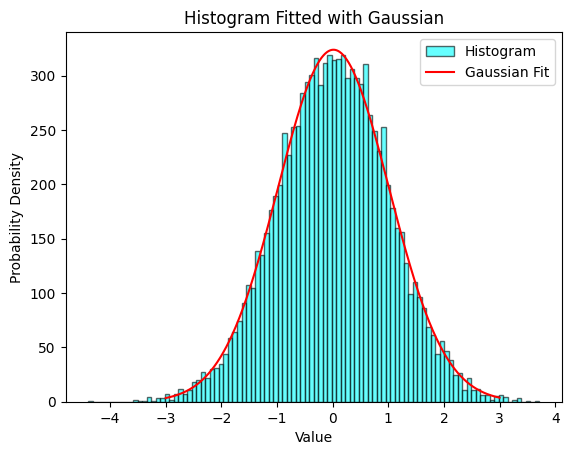

In [1]:

# JK 8.11.2023
# using ChatGPT

import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
from scipy.stats import chisquare

def gaussian(x, amplitude, mean, std_deviation):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * std_deviation ** 2))


# Sample data as a Python list
data_list = []

nbins = 100
Ngen = 10000
for i in range(0,Ngen):
    data_list.append(random.gauss(0,1))
# Convert the list to a NumPy array
data_array = np.array(data_list)

# simpler:
#np.random.seed(0)
#data_array = np.random.normal(0, 1, Ngen) 

### Create a histogram
#plt.hist(data_array, bins=nbins, edgecolor='black', color='cyan', density=True, alpha=0.6)
## Add labels and a title
#plt.xlabel('Value')
#plt.ylabel('Frequency')
#plt.title('Histogram of Data')

hist, bin_edges = np.histogram(data_array, bins=nbins)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
# Initial parameter estimates for the fit
initial_parameters = [1.0, 0.0, 1.0]

# Perform the fit
params, covariance = curve_fit(gaussian, bin_centers, hist, p0=initial_parameters)

# Extract the fitted parameters
amplitude, mean, std_deviation = params

# Plot the histogram
plt.hist(data_array, bins=nbins, density=False, edgecolor='black', color='cyan', alpha=0.6, label='Histogram')

# Generate x-values for the Gaussian fit
x_fit = np.linspace(-3, 3, 1000)

# Plot the Gaussian fit
plt.plot(x_fit, gaussian(x_fit, amplitude, mean, std_deviation), 'r-', label='Gaussian Fit')

# Add labels, legend, and title
plt.xlabel('Value')
#plt.yscale('log')
plt.ylabel('Probability Density')
plt.title('Histogram Fitted with Gaussian')
plt.legend()


# Generate expected values based on the fitted model
expected_values = gaussian(bin_centers, amplitude, mean, std_deviation)

hist_norm = hist / np.sum(hist)
expected_values_norm = expected_values / np.sum(expected_values)

# Calculate the chi-squared value and the number of degrees of freedom
degrees_of_freedom = len(hist) - len(params)
#chi_squared, p_value = chisquare(hist, f_exp=expected_values, ddof=degrees_of_freedom )
chi_squared, p_value = chisquare(hist_norm, f_exp=expected_values_norm, ddof=degrees_of_freedom)


print("Chi-squared value           : {:1.4f}".format(chi_squared))
print("Number of degrees of freedom: {}".format(degrees_of_freedom))
print("Chi-squared value / ndf     : {:1.4f}".format(chi_squared / degrees_of_freedom))


# Display the histogram
plt.show()

